In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Tahoma']
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)


3/22/20
22-03-20


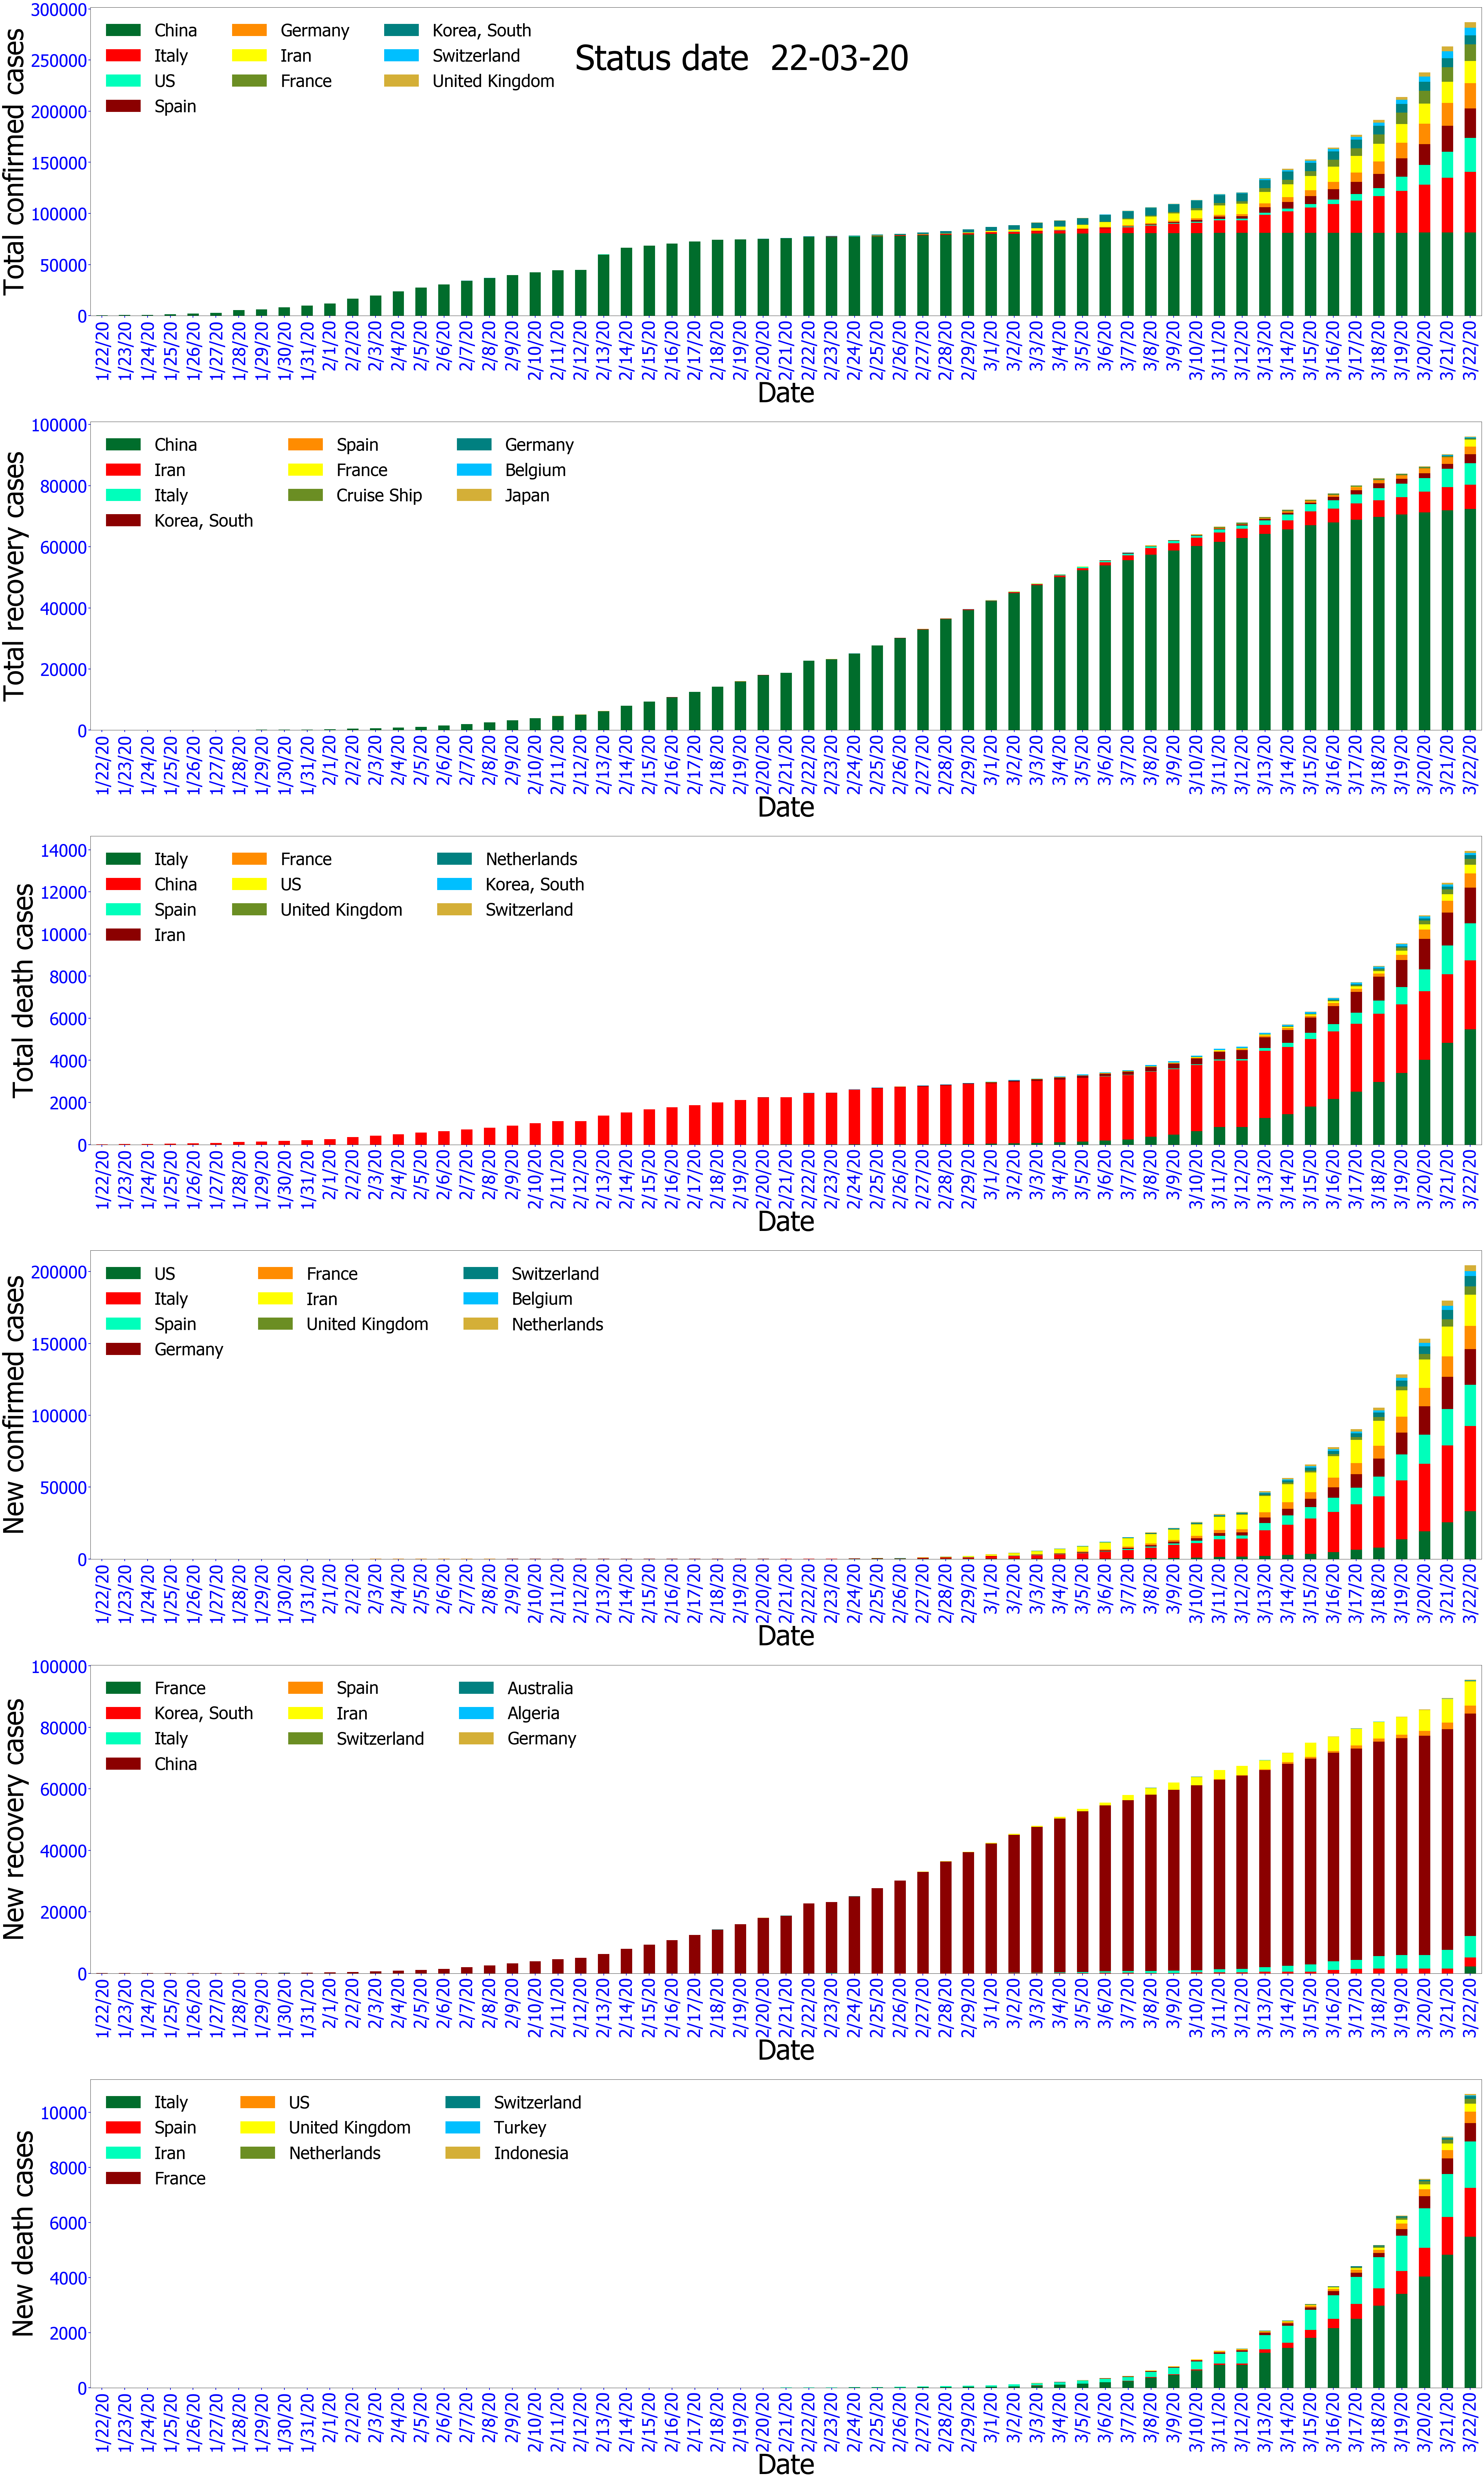

In [12]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_death = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_recovery = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
df = pd.read_csv(url, error_bad_lines=False)
death = pd.read_csv(url_death, error_bad_lines=False)
recovery = pd.read_csv(url_recovery, error_bad_lines=False)



df.drop(df.index[[1,2,3]])
death.drop(death.index[[1,2,3]])
recovery.drop(recovery.index[[1,2,3]])


date = df.columns[4:]
#print(date)



df_confine = df.groupby('Country/Region')[date].sum()
#df_total_confine=df.groupby('data')[date].sum()
df_death = death.groupby('Country/Region')[date].sum()
df_recovery = recovery.groupby('Country/Region')[date].sum()



df_confineT = df_confine.T
df_deathT = df_death.T
df_recoveryT = df_recovery.T


#print(df_confineT.diff())

#Here I am making a differences new cases added to it

df_confineT_diff=df_confineT.diff()
df_recoveryT_diff=df_recoveryT.diff()
df_deathT_diff=df_deathT.diff()

#print(df_confineT.index)
#print(df_confineT.head(n=3))
sort_df_confineT = df_confineT.sort_values(by=df_confineT.index[-1],axis=1,ascending=False)
sort_df_recoveryT = df_recoveryT.sort_values(by=df_recoveryT.index[-1],axis=1,ascending=False)
sort_df_deathT = df_deathT.sort_values(by=df_deathT.index[-1],axis=1,ascending=False)


sort_df_confineT_diff = df_confineT_diff.sort_values(by=df_confineT_diff.index[-1],axis=1,ascending=False)
sort_df_recoveryT_diff = df_recoveryT_diff.sort_values(by=df_recoveryT_diff.index[-1],axis=1,ascending=False)
sort_df_deathT_diff = df_deathT_diff.sort_values(by=df_deathT_diff.index[-1],axis=1,ascending=False)

#print(sort_df_confineT.tail(n=1))

sort_df_confineT_20=sort_df_confineT.iloc[:, : 10]
label_sort_df_confineT_20 = sort_df_confineT_20.columns

sort_df_recoveryT_20=sort_df_recoveryT.iloc[:, : 10]
label_sort_df_recoveryT_20 = sort_df_recoveryT_20.columns

sort_df_deathT_20=sort_df_deathT.iloc[:, : 10]
label_sort_df_deathT_20 = sort_df_deathT_20.columns

sort_df_confineT_20_diff=sort_df_confineT_diff.iloc[:, : 10]
label_sort_df_confineT_20_diff = sort_df_confineT_20_diff.columns

sort_df_recoveryT_20_diff=sort_df_recoveryT_diff.iloc[:, : 10]
label_sort_df_recoveryT_20_diff = sort_df_recoveryT_20_diff.columns

sort_df_deathT_20_diff=sort_df_deathT_diff.iloc[:, : 10]
label_sort_df_deathT_20_diff = sort_df_deathT_20_diff.columns


#label = ['China','Italy','Iran','Spain','Germany','France','Korea, South', 'US','Switzerland','United Kingdom','Netherlands','Austria','Norway','Belgium','Sweden','Denmark','Japan','Malaysia','Canada']
#label = ['Italy','Spain','Germany','France','Switzerland','Netherlands','Austria','Belgium','Sweden','Poland','Denmark','Norway','Finland']
#label = ['India','Pakistan', 'Bangladesh','Bhutan','Nepal']
df_confine_sel = df_confineT[label_sort_df_confineT_20]
df_death_sel = df_deathT[label_sort_df_deathT_20]
df_recovery_sel = df_recoveryT[label_sort_df_recoveryT_20]

df_confine_sel_diff = df_confineT[label_sort_df_confineT_20_diff]
df_recovery_sel_diff = df_recoveryT[label_sort_df_recoveryT_20_diff]
df_death_sel_diff = df_deathT[label_sort_df_deathT_20_diff]


first_column = sort_df_deathT_20_diff.index[-1]
print(first_column)

import datetime
date=datetime.datetime.strptime(first_column, '%m/%d/%y').strftime('%d-%m-%y')

print(date)

colors = ["#006D2C", "#FF0000","#00FFBB","#8B0000","#FF8C00","#FFFF00","#6B8E23","#008080","#00BFFF","#d4af37","#000000","#000AAA","#BBBFFF","#CCCBBB","#BB8080","#FF8080","#CC0000","#DD00AA","#ff00ff","#00ff00"]


fig, axes = plt.subplots(nrows=6, ncols=1,figsize=(60,1000))
#ax=plt.subplot(2,3,1)
#print(axes)
#axes[0].legend(loc='upper left', frameon=False)
#ax =df_confine_sel.plot.bar(stacked=True, color=colors, figsize=(20,20))
ax1=df_confine_sel.plot.bar(ax=axes[0],stacked=True, color=colors,figsize=(60,100))
ax1.set_xlabel('Date',fontsize=80)
ax1.set_ylabel('Total confirmed cases',fontsize=80)

ax1.tick_params(direction='out', length=6, width=2, colors='b',
               grid_color='b', grid_alpha=0.5,labelsize=50)

#ax1.xaxis.set_major_locator(MultipleLocator(5))
#ax1.xaxis.set_major_formatter(FormatStrFormatter('%d'))
#ax1.xaxis.set_major_locator(plt.MaxNLocator(1))


ax1.legend(frameon=False, loc='upper left', ncol=3,fontsize=50)
current_handles, _ = plt.gca().get_legend_handles_labels()
labels = df_confine_sel.columns
fig.tight_layout(pad=2.5)

ax1 =df_recovery_sel.plot.bar(ax=axes[1],stacked=True, color=colors,figsize=(60,100))
ax1.set_xlabel('Date',fontsize=80)
ax1.set_ylabel('Total recovery cases',fontsize=80)
ax1.tick_params(direction='out', length=6, width=2, colors='b',
               grid_color='b', grid_alpha=0.5,labelsize=50)
ax1.legend(frameon=False, loc='upper left', ncol=3,fontsize=50)
current_handles, _ = plt.gca().get_legend_handles_labels()
labels = df_confine_sel.columns
fig.tight_layout(pad=2.5)

ax1 =df_death_sel.plot.bar(ax=axes[2],stacked=True, color=colors,figsize=(60,100))
ax1.set_xlabel('Date',fontsize=80)
ax1.set_ylabel('Total death cases',fontsize=80)
ax1.tick_params(direction='out', length=6, width=2, colors='b',
               grid_color='b', grid_alpha=0.5,labelsize=50)
ax1.legend(frameon=False, loc='upper left', ncol=3,fontsize=50)
current_handles, _ = plt.gca().get_legend_handles_labels()
labels = df_confine_sel.columns
fig.tight_layout(pad=2.5)
               
ax1 =df_confine_sel_diff.plot.bar(ax=axes[3],stacked=True, color=colors,figsize=(60,100))
ax1.set_xlabel('Date',fontsize=80)
ax1.set_ylabel('New confirmed cases',fontsize=80)
ax1.tick_params(direction='out', length=6, width=2, colors='b',
               grid_color='b', grid_alpha=0.5,labelsize=50)
ax1.legend(frameon=False, loc='upper left', ncol=3,fontsize=50)
current_handles, _ = plt.gca().get_legend_handles_labels()
labels = df_confine_sel.columns
fig.tight_layout(pad=2.5)

ax1 =df_recovery_sel_diff.plot.bar(ax=axes[4],stacked=True, color=colors,figsize=(60,100))
ax1.set_xlabel('Date',fontsize=80)
ax1.set_ylabel('New recovery cases',fontsize=80)
ax1.tick_params(direction='out', length=6, width=2, colors='b',
               grid_color='b', grid_alpha=0.5,labelsize=50)
ax1.legend(frameon=False, loc='upper left', ncol=3,fontsize=50)
current_handles, _ = plt.gca().get_legend_handles_labels()
labels = df_confine_sel.columns
fig.tight_layout(pad=2.5)
               
ax1 =df_death_sel_diff.plot.bar(ax=axes[5],stacked=True, color=colors,figsize=(60,100))
ax1.set_xlabel('Date',fontsize=80)
ax1.set_ylabel('New death cases',fontsize=80)
ax1.tick_params(direction='out', length=6, width=2, colors='b',
               grid_color='b', grid_alpha=0.5,labelsize=50)
ax1.legend(frameon=False, loc='upper left', ncol=3,fontsize=50)
current_handles, _ = plt.gca().get_legend_handles_labels()
labels = df_confine_sel.columns
fig.tight_layout(pad=2.5)               
               
fig.suptitle('Status date  '+date, fontsize=100)  
#plt.savefig('topten.pdf')
plt.savefig(date+'topten.jpeg')               
plt.show()
